<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/Ecuaciones-Diferenciales-Parciales-2/blob/main/Metodo_de_Colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considere el problema de valor inicial $u ^{´´}+u=x$ con las condiciones $u(0)=0$ y $u^´(0)=2$ Encuentre una solución aproximada de la forma

$$u_{N}=α_0 + α_1x + α_2x_2 + α_3x_3 +⋯$$

(i) Elija $α_0$ y $α_1$ para satisfacer las condiciones dadas.

ii) Defina $ϵ=u^{′′}_{N} + u_N - x$ y encuentre $ϵ$ en este caso.

Restringiendo $u_N$ a un polinomio cúbico, use $x=\frac{1}{2}$ y $x=1$ como puntos de colocación para encontrar una solución aproximada.


In [82]:
#Importación de librerías
import sympy as sp #Para cálculo simbólico
import numpy as np # Para operaciones numéricas
import matplotlib.pyplot as plt #Para visualización

## Definición de variables y función

In [83]:
x, a2, a3 = sp.symbols('x a2 a3')  # Variables: x (independiente), a2, a3 (coeficientes por determinar)
u = sp.Function('u')  # Función u(x)

Se define la ecuación diferencial $u^{''} + u = x$

In [84]:
#Definición de la EDO
ode = u(x).diff(x, 2) + u(x) - x  # u'' + u = x -> u'' + u - x = 0

Se resuelve analíticamente con las condiciones iniciales

In [85]:
#Solución exacta
sol_exact = sp.dsolve(ode, ics={u(0): 0, sp.diff(u(x), x).subs(x, 0): 2})
print("Solución exacta:")
sp.pprint(sol_exact.rhs)

Solución exacta:
x + sin(x)


In [86]:
#Aproximación polinómica cúbica
# (i) Condiciones iniciales: u(0)=0 -> a0=0, u'(0)=2 -> a1=2
# u_N = 2*x + a2*x^2 + a3*x^3
u_N = 2*x + a2*x**2 + a3*x**3

In [87]:
#Cálculo del residuo ε = u_N'' + u_N - x
u_N_diff2 = sp.diff(u_N, x, 2)  # Segunda derivada
epsilon = u_N_diff2 + u_N - x    # Residuo
print("\nResiduo ε:")
sp.pprint(epsilon)


Residuo ε:
    2       3                      
a₂⋅x  + a₃⋅x  + x + 2⋅(a₂ + 3⋅a₃⋅x)


Se eligen puntos de colocación: $x =\frac{1}{2}$ y $x = 1$

In [88]:
# Método de colocación
# Usamos x = 1/2 y x = 1 como puntos de colocación
puntos = [sp.Rational(1, 2), sp.Rational(1, 1)]  # x = 1/2, x = 1

Se crea sistema de ecuaciones igualando el residuo a cero en esos puntos

In [89]:
# Creamos ecuaciones igualando el residuo a 0 en los puntos de colocación
ecuaciones = [sp.Eq(epsilon.subs(x, p), 0) for p in puntos]

In [90]:
# Resolución del sistema para a2 y a3
sol_coeficientes = sp.solve(ecuaciones, (a2, a3))
print("\nSistema de ecuaciones:")
for eq in ecuaciones:
    sp.pprint(eq)
print("\nCoeficientes encontrados:", sol_coeficientes)


Sistema de ecuaciones:
9⋅a₂   25⋅a₃   1    
──── + ───── + ─ = 0
 4       8     2    
3⋅a₂ + 7⋅a₃ + 1 = 0

Coeficientes encontrados: {a2: -1/17, a3: -2/17}


Se obtiene la aproximación final con los coeficientes calculados

In [91]:
#Sustitución en la aproximación
u_aproximada = u_N.subs(sol_coeficientes)
print("\nAproximación polinómica u_N:")
sp.pprint(u_aproximada)


Aproximación polinómica u_N:
     3    2      
  2⋅x    x       
- ──── - ── + 2⋅x
   17    17      


In [92]:
#Conversión a funciones numéricas
u_exacta_fn = sp.lambdify(x, sol_exact.rhs, "numpy")
u_aproximada_fn = sp.lambdify(x, u_aproximada, "numpy")

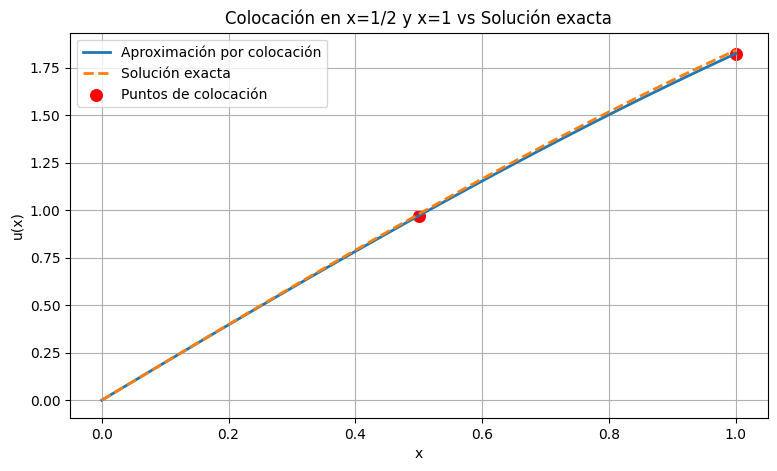

In [93]:
xx = np.linspace(0, 1, 100)
plt.figure(figsize=(9, 5))
plt.plot(xx, u_aproximada_fn(xx), label="Aproximación por colocación", linewidth=2)
plt.plot(xx, u_exacta_fn(xx), "--", label="Solución exacta", linewidth=2)

# Puntos de colocación
plt.scatter([0.5, 1.0], u_aproximada_fn(np.array([0.5, 1.0])),
           color="red", s=70, label="Puntos de colocación")

plt.title("Colocación en x=1/2 y x=1 vs Solución exacta")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()